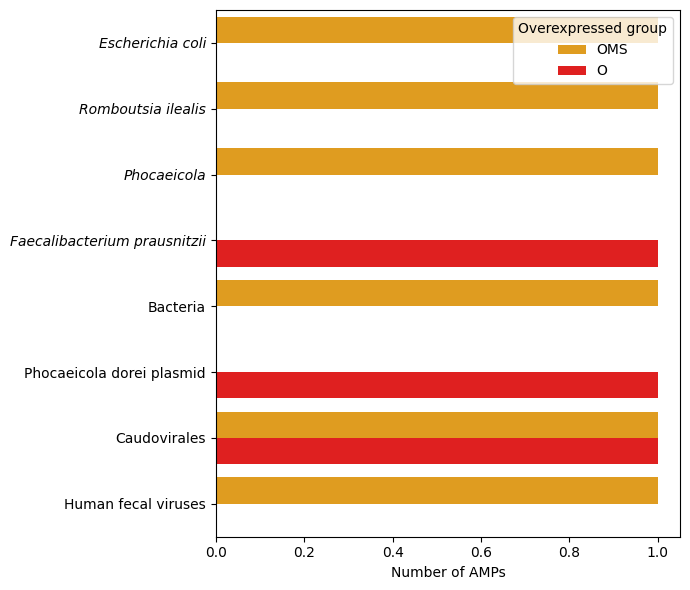

<Figure size 640x480 with 0 Axes>

In [3]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data import
data = pd.read_csv("./barplot_values.tsv", delimiter="\t")

# Colors
my_colors = ["orange", "red"]
sns.set_palette(my_colors)

# Creation of working directory
def makemydir(whatever):
    try:
        os.makedirs(whatever, exist_ok=True)  # Simplified with exist_ok=True
    except OSError:
        pass

for dir in ["./03_barplot_overexpressed/"]:
    makemydir(dir)

# Barplot
def barplot():
    # Figure size
    plt.figure(figsize=(7, 6))
    
    sns.barplot(data=data,
                x="number_AMPs",
                hue="group",
                y="species")
    plt.title("")
    plt.xlabel("Number of AMPs")
    plt.ylabel("")
    plt.legend(title="Overexpressed group")

    # Get the current y-tick labels
    ax = plt.gca()
    yticks = ax.get_yticklabels()

    # Apply italics to genus and species labels
    for label in yticks:
        taxon = label.get_text()
        taxon_rank = data.loc[data["species"] == taxon, "rank"].values  # Get rank(s)

        if len(taxon_rank) > 0 and taxon_rank[0] in ["Genus", "Species"]:  # Check for valid rank
            label.set_fontstyle("italic")

    plt.tight_layout()
    plt.savefig("./barplot_overexpressed.svg")
    plt.savefig("./barplot_overexpressed.png")
    plt.show()
    plt.clf()

barplot()
